In [2]:
import pandas as pd
import cufflinks as cf

In [11]:
path_confirmed = ("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"
                  "csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
path_death = ("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"
              "csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv") 
path_recovered = ("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"
                  "csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv")

In [12]:
def set_index(df):
    # Set region, country, lat and long as index
    index = pd.MultiIndex.from_frame(df.iloc[:, :4])
    # Set the index and transpose
    df = df.iloc[:, 4:].set_index(index).T
    # Set date as index
    return df.set_index(pd.to_datetime(df.index, dayfirst=False))

df_conf = pd.read_csv(path_confirmed)
df_conf = set_index(df_conf)

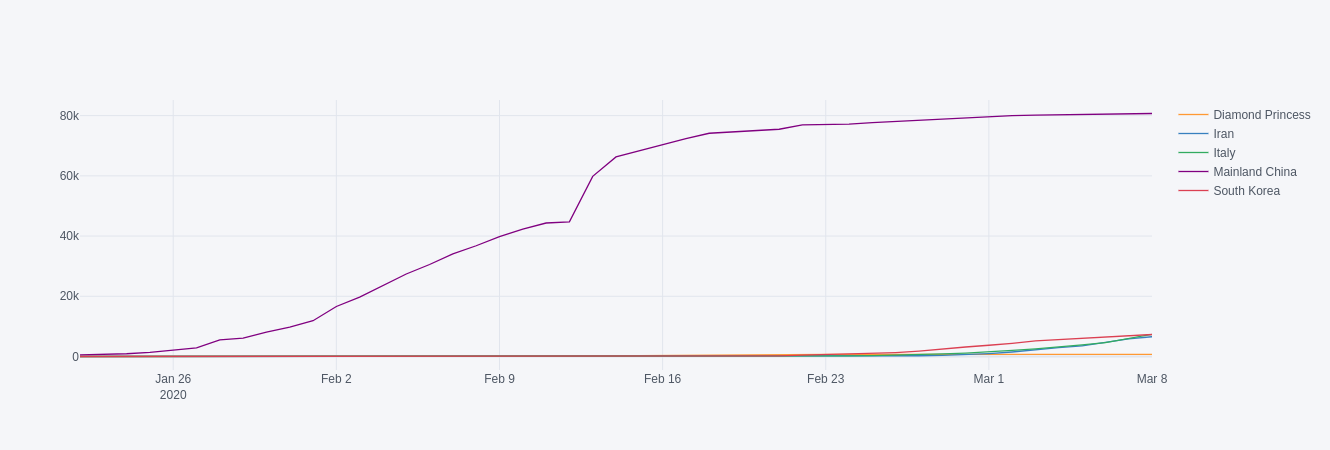

In [14]:
def plot_range(df_input, start=0, end=5, figsize=(20,5)):
    df = df_input.groupby(level=1, axis=1).sum()
    countries = df.sum().sort_values(ascending=False).iloc[start:end].index
  
    df = (
        df
        .loc[:, lambda df: df.columns.get_level_values('Country/Region').isin(countries)]
#         .reset_index()
#         .melt(id_vars='index')
#         .rename(columns={"index": "Date", "value": "Count"})
    )
    
    df.iplot(kind='scatter', filename='cufflinks/cf-simple-line')
    
#     plt.figure(figsize=figsize)

#     ax = sns.lineplot(x="Date", y="Count",
#              hue="Country/Region", #style="event",
#              data=df)

#     plt.xticks(rotation=45);
    
plot_range(df_conf.rename(columns={'Others': 'Diamond Princess'}))